## Problem Statement: Whether the client has subscribed a term deposit or not

In [143]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [82]:
bank = pd.read_csv('bank-full.csv',sep=';')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [83]:
bank.shape

(45211, 17)

In [84]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [85]:
bank.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [86]:
bank.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [87]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [88]:
bank[bank.duplicated()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [89]:
bank['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [90]:
bank[bank['job']=='student']

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
151,26,student,single,secondary,no,0,yes,no,unknown,5,may,610,2,-1,0,unknown,no
203,35,student,single,unknown,no,298,yes,no,unknown,5,may,611,2,-1,0,unknown,no
265,30,student,single,tertiary,no,25,yes,no,unknown,5,may,89,2,-1,0,unknown,no
292,24,student,single,secondary,no,423,yes,no,unknown,5,may,226,3,-1,0,unknown,no
297,24,student,single,secondary,no,82,yes,no,unknown,5,may,204,2,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45148,22,student,single,secondary,no,2488,no,no,cellular,8,nov,449,2,38,10,other,yes
45158,34,student,single,unknown,no,2321,no,no,cellular,9,nov,600,2,99,5,failure,no
45170,19,student,single,primary,no,245,no,no,telephone,10,nov,98,2,110,2,other,no
45196,25,student,single,secondary,no,358,no,no,cellular,16,nov,330,1,-1,0,unknown,yes


In [91]:
bank[bank['age']==93]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
44262,93,retired,married,unknown,no,775,no,no,cellular,22,jul,860,2,177,7,success,yes
44420,93,retired,married,unknown,no,775,no,no,cellular,4,aug,476,2,13,9,success,yes


In [92]:
bank.y.value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [93]:
bank.poutcome.unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [94]:
bank[bank['marital']=='married']

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [95]:
bank.loan.value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

Text(0, 0.5, 'Frequency of Loan Purchase')

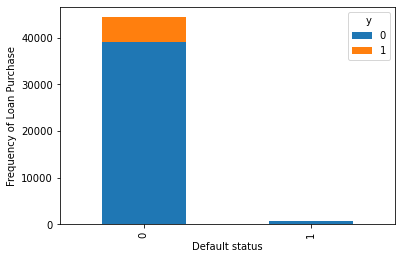

In [149]:
pd.crosstab(bank.default,bank.y).plot(kind='bar',stacked=True)
plt.xlabel('Default status')
plt.ylabel('Frequency of Loan Purchase')

Text(0, 0.5, 'Frequency of Loan Purchase')

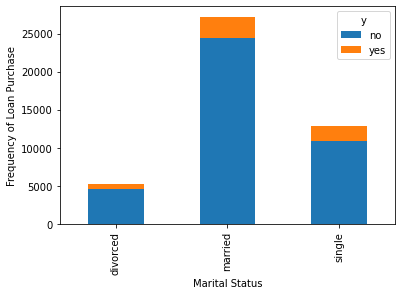

In [98]:
pd.crosstab(bank.marital,bank.y).plot(kind='bar',stacked=True)
plt.xlabel('Marital Status')
plt.ylabel('Frequency of Loan Purchase')

Text(0, 0.5, 'Frequency of Loan Purchase')

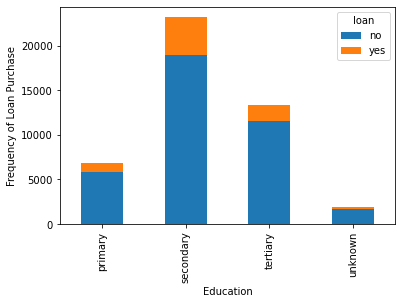

In [99]:
pd.crosstab(bank.education,bank.loan).plot(kind='bar',stacked=True)
plt.xlabel('Education')
plt.ylabel('Frequency of Loan Purchase')

Text(0, 0.5, 'Frequency of Loan Purchase')

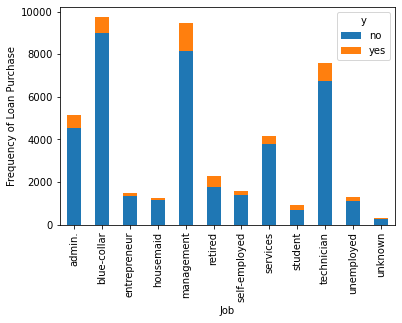

In [100]:
pd.crosstab(bank.job,bank.y).plot(kind='bar',stacked=True)
plt.xlabel('Job')
plt.ylabel('Frequency of Loan Purchase')

Text(0, 0.5, 'Frequency of Loan Purchase')

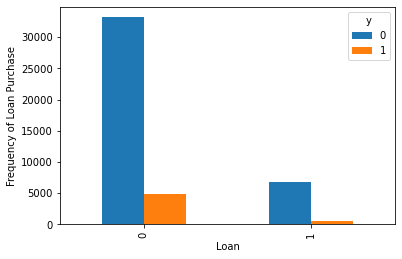

In [147]:
pd.crosstab(bank.loan,bank.y).plot(kind='bar',stacked=False)
plt.xlabel('Loan')
plt.ylabel('Frequency of Loan Purchase')

Text(0, 0.5, 'Frequency of Loan Purchase')

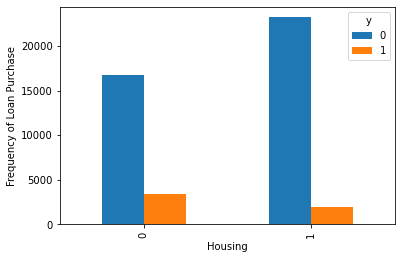

In [146]:
pd.crosstab(bank.housing,bank.y).plot(kind='bar',stacked=False)
plt.xlabel('Housing')
plt.ylabel('Frequency of Loan Purchase')

In [104]:
bank['month'] = bank['month'].replace({'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6,
                     'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec': 12}
                     )
bank = bank.replace({'yes':1,'no':0})
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,5,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,5,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,5,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,5,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,5,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,0,cellular,17,11,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,0,1729,0,0,cellular,17,11,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,0,5715,0,0,cellular,17,11,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,0,668,0,0,telephone,17,11,508,4,-1,0,unknown,0


C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

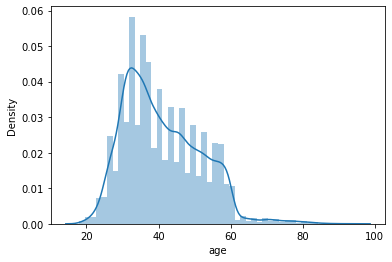

In [106]:
sns.distplot(bank['age'])

In [107]:
label = LabelEncoder()
bank['job']=label.fit_transform(bank.job)
bank['marital']=label.fit_transform(bank.marital)
bank['education']=label.fit_transform(bank.education)
bank['contact']=label.fit_transform(bank.contact)
bank['poutcome']=label.fit_transform(bank.poutcome)
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,5,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,5,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,5,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,5,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,5,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,11,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,11,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,11,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,11,508,4,-1,0,3,0


In [108]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

## Training the model

In [118]:
# Dividing our data into input and output variables 
X = bank.iloc[:,0:16]
Y = bank.iloc[:,16]

In [119]:
X

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,4,1,2,0,2143,1,0,2,5,5,261,1,-1,0,3
1,44,9,2,1,0,29,1,0,2,5,5,151,1,-1,0,3
2,33,2,1,1,0,2,1,1,2,5,5,76,1,-1,0,3
3,47,1,1,3,0,1506,1,0,2,5,5,92,1,-1,0,3
4,33,11,2,3,0,1,0,0,2,5,5,198,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,11,977,3,-1,0,3
45207,71,5,0,0,0,1729,0,0,0,17,11,456,2,-1,0,3
45208,72,5,1,1,0,5715,0,0,0,17,11,1127,5,184,3,2
45209,57,1,1,1,0,668,0,0,1,17,11,508,4,-1,0,3


In [120]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

In [121]:
# Logistic regression model
classifier=LogisticRegression()
classifier.fit(X,Y)

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [122]:
classifier.coef_

array([[-2.38325798e-02,  5.58912839e-02, -1.20655848e-01,
        -1.23394940e-02, -6.01879605e-03,  3.95219689e-05,
        -2.42607871e-01, -6.49426964e-02, -2.86468202e-01,
        -1.73552662e-02, -8.27459781e-02,  3.47457421e-03,
        -2.99260845e-01, -1.32737541e-03,  1.28336605e-01,
        -2.29285395e-01]])

In [123]:
classifier.classes_

array([0, 1], dtype=int64)

In [124]:
classifier.predict_proba(X)

array([[0.93722876, 0.06277124],
       [0.93489219, 0.06510781],
       [0.95254766, 0.04745234],
       ...,
       [0.63093017, 0.36906983],
       [0.95724007, 0.04275993],
       [0.62040409, 0.37959591]])

In [144]:
classifier.score(X,Y)
print('Accuracy:',np.round(classifier.score(X,Y)*100,4))

Accuracy: 88.6643


## Model Predictions

In [126]:
# Predict for x dataset
y_pred=classifier.predict(X)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [127]:
y_pred_df=pd.DataFrame({'actual_y':Y,'pred_prob':y_pred})
y_pred_df

,actual_y,pred_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,0
45207,1,0
45208,1,0
45209,0,0


## Testing model accuracy

In [130]:
# Confusion Matrix for the model accuracy
confusion_matrix = confusion_matrix(Y,y_pred)
confusion_matrix

array([[39184,   738],
       [ 4387,   902]], dtype=int64)

In [131]:
(39184+902)/(39184+738+4387+902)

0.8866426312180664

In [132]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.55      0.17      0.26      5289

    accuracy                           0.89     45211
   macro avg       0.72      0.58      0.60     45211
weighted avg       0.86      0.89      0.86     45211



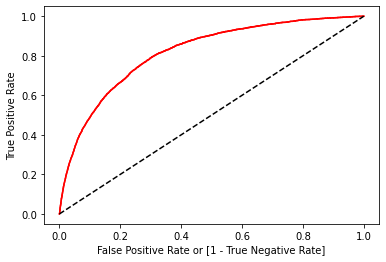

In [133]:
# ROC Curve plotting and finding AUC value
fpr,tpr,thresholds = roc_curve(Y,classifier.predict_proba(X)[:,1])
plt.plot(fpr,tpr,color='red')
auc = roc_auc_score(Y,y_pred)

plt.plot(fpr,tpr,color='red',label='logit model(area  = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

In [134]:
auc = roc_auc_score(Y, y_pred)
print(auc)

0.576028293932859


In [135]:
import statsmodels.api as smf
model = smf.Logit(Y,X).fit()

Optimization terminated successfully.
         Current function value: 0.275606
         Iterations 8


In [136]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45195
Method:                           MLE   Df Model:                           15
Date:                Fri, 28 Jan 2022   Pseudo R-squ.:                  0.2363
Time:                        15:47:53   Log-Likelihood:                -12460.
converged:                       True   LL-Null:                       -16315.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.0201      0.001    -15.314      0.000      -0.023      -0.018
job           -0.0138      0.005     -2.677      0.007      -0.024      -0.004
marital       -0.1628      0.026     -6.228      0.000      -0.214      -0.112
education      0.0503      0.022      2.259      0.024       0.007       0.094
default       -0.3838      0.159     -2.408      0.016      -0.696      -0.071
balance     2.262e-05   4.51e-06      5.017      0.000    1.38e-05    3.15e-05
housing       -1.2730      0.036    -35.289      0.000      -1.344      -1.202
loan          -0.8062      0.056    -14.299      0.000      -0.917      -0.696
contact       -0.6081      0.026    -23.428      0.000      -0.659      -0.557
day           -0.0148      0.002     -7.503      0.000      -0.019      -0.011
month         -0.0507      0.006     -8.326      0.000      -0.063      -0.039
duration       0.0038   6.01e-05     63.270      0.000       0.004       0.004
campaign      -0.1627      0.010    -15.558      0.000      -0.183      -0.142
pdays          0.0003      0.000      1.486      0.137      -0.000       0.001
previous       0.0583      0.008      7.338      0.000       0.043       0.074
poutcome      -0.1945      0.022     -8.672      0.000      -0.239      -0.151
==============================================================================
"""